In [11]:
from edahelper import *

wsb_og = pd.read_csv("../../../Data/subreddit_WallStreetBets/full.csv")


C:\Users\lnajt\anaconda3\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (26,32,45,79,82,87,116,117,118,121,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
import datetime

def DataSetup(dfog, exclude_removed=True, drop_na_cols=['title']):
    if exclude_removed:
        tempdf=dfog.loc[(((dfog.removed_by_category.isnull()))) & ((dfog.is_self==True))]
        #tempdf=dfog.loc[(((dfog.removed_by_category.isnull()))) & ((dfog.is_self==True) & ~(dfog["title"].str.contains("Thread|thread|Sunday Live Chat|consolidation zone|Containment Zone|Daily Discussion|Daily discussion|Saturday Chat|What Are Your Moves Tomorrow|What Are Your Moves Today|MEGATHREAD",na=False)))]
    else:
        tempdf=dfog.loc[dfog.is_self==True]
        #tempdf=dfog.loc[((dfog.is_self==True) & ~(dfog["title"].str.contains("Thread|thread|Sunday Live Chat|consolidation zone|Containment Zone|Daily Discussion|Daily discussion|Saturday Chat|What Are Your Moves Tomorrow|What Are Your Moves Today|MEGATHREAD",na=False)))]
    tempdf=tempdf.dropna(subset = drop_na_cols)
    tempdf['utc']=tempdf.created_utc.apply(lambda x : datetime.datetime.utcfromtimestamp(x))
    return tempdf

wsb["date"] = wsb["created_utc"].apply(lambda x : datetime.datetime.utcfromtimestamp(x).date() )
wsb = DataSetup(wsb)

In [12]:
len(wsb)/len(wsb_og)

0.04797272259106819

In [52]:
pd.options.display.max_colwidth = 800
wsb.sort_values(by = 'ups')[['title', 'ups']]

,title,ups
990859,Good idea to go into banking area?,0
381353,Do you think that General Motors could follow Tesla in their revolution path on Electric Vehicles ? Pros and Cons please.,0
381443,"DISCORD INVITE LINK INVALID/EXPIRED? Or maybe the group is just full? Does anyone know why? Much appreciated, thanks.",0
381453,Why is it such a good thing that Chamath is in on GME?????????????????????????????????????????????????,0
381475,"Listen here retards, instead of giving each other gay reddit gold, put the money in a PAC. You need some well bribed politicians in your back pocket for when the SEC comes for you",0
...,...,...
529993,DO NOT SELL! Robinhood has blocked the buying of more shares. If you try to sell you will get fucked because who are you going to sell it to if nobody can buy it? They are trying to make you flood the market with sales offers and bring the price down. Dont fall for it!,110134
484662,Like this post if you are holding!!💎 The real squeeze is yet to happen🚀,139115
555023,"An Open Letter to Melvin Capital, CNBC, Boomers, and WSB",143485
574376,Can we all take a moment and appreciate the Mods who have grinded through this and held our community together. Thank you.,194994


## Score / ups
The number of upvotes

### The preponderance of ignored submissions

One of the first things that is noticeable is that the vast majority of posts have only a handful of upvotes.

See for instance the frequency at which different upvote values occur:

In [44]:
40 * "abc"

'abcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabcabc'

In [22]:
wsb.ups.value_counts().head(20)/len(wsb)

0     0.066212
1     0.051673
3     0.027375
5     0.027276
7     0.026035
6     0.025952
4     0.025390
8     0.025274
9     0.023339
2     0.023107
10    0.022032
11    0.021040
13    0.018757
12    0.018443
14    0.016656
15    0.016061
16    0.015664
18    0.014870
17    0.014109
20    0.012984
Name: ups, dtype: float64

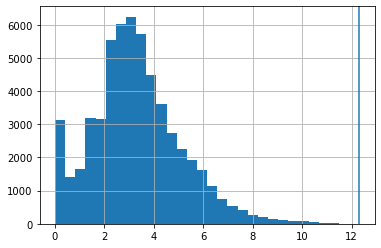

In [43]:
pos_only = wsb[wsb.ups > 0]
pos_only.ups.apply( lambda x : np.log(x)).hist(bins = 30)
plt.axvline(pos_only.ups.apply( lambda x : np.log(x)).max())

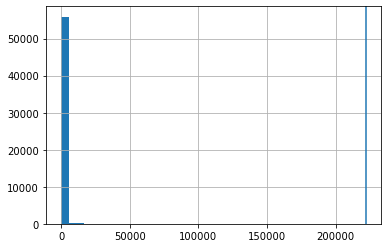

In [39]:
pos_only = wsb[wsb.ups > 0].ups#.apply( lambda x : np.log(x))
pos_only.hist(bins = 40)
plt.axvline(pos_only.max())

In [31]:
pos_only.ups.apply( lambda x : np.log(x)).max()

12.310175871130001

In [14]:
np.log(np.e)

1.0

In [35]:
pos_only.ups.apply( lambda x : np.log(x)).median()

3.1354942159291497

0.7174753637609433


<AxesSubplot:ylabel='Frequency'>

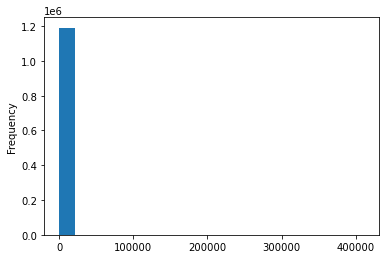

In [16]:
wsb['log_ups'] = wsb.ups.apply(lambda x : np.log(x))
print(len(wsb[wsb.ups == 1])/len(wsb))
wsb[wsb.log_ups >= 0].ups.plot(kind = 'hist', bins = 20)

## Upvote ratio

Because most of the posts linger around 1 vote, and presumably never get seen, for upvote ratios less than one to become common you have to filter out the never seen posts.

Additionally, posts with upvote_ratio < .8 are very rare even after having filtered out the ignored posts.

<AxesSubplot:ylabel='Frequency'>

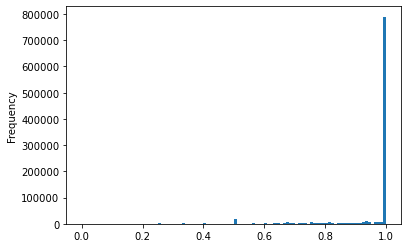

In [11]:
wsb['upvote_ratio'].plot( kind = 'hist', bins = 100)


<AxesSubplot:ylabel='Frequency'>

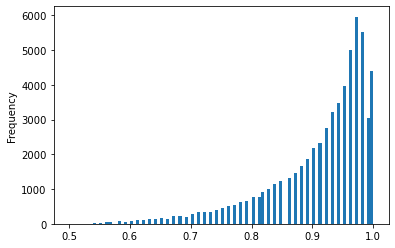

In [13]:
wsb[wsb['ups'] >= 20]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

<AxesSubplot:ylabel='Frequency'>

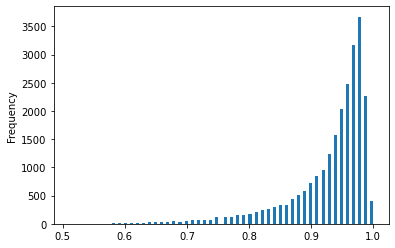

In [12]:
wsb[wsb['ups'] >= 100]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

## Authors

Which authors are the most popular? 
Are there authors that are consistently popular? Or do highly upvoted posts tend to be someones 15 minutes of fame?

In [22]:
total_upvotes = wsb[['author', 'ups']].groupby("author").agg("sum").sort_values(by = 'ups', ascending = False)
total_upvotes.head(10)

,ups
author,
None,8718074
DeepFuckingValue,1551072
OPINION_IS_UNPOPULAR,1258349
keenfeed,1051350
game_stone,743846
dhiral1994,517203
SomeGuyInDeutschland,411137
MIA4real,371842
jordanpeterson9,348100


In [27]:
median_upvotes = wsb[['author', 'ups']].groupby("author").agg(["median", "count"]).sort_values(by = ('ups', 'median'), ascending = False)

In [36]:
median_upvotes.head(10)

ups      
                        median count
author                              
SomeGuyInDeutschland  411137.0     1
mpwrd                 210591.0     1
84935                 209354.0     1
kampingcarl           162833.0     1
CockInAClock          140996.0     1
Bundaga               139455.0     1
liftingtailsofcats    137862.0     1
jeepers_sheepers      126138.0     1
LilHMoney             123084.0     1
yellow_duck12         120417.0     1

I thought SomeGuyInDeutschland had more popular posts than this? (Seems like he did, but before the new year: https://www.reddit.com/user/SomeGuyInDeutschland/posts/ )

In [35]:
author_popularity = wsb[["author", "ups"]].groupby("author").agg(["sum", "count", "mean", 'median'])
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(10)
# A lot of the popular posts are one hit wonders...

ups                          
                         sum count      mean    median
author                                                
SomeGuyInDeutschland  411137     1  411137.0  411137.0
mpwrd                 210591     1  210591.0  210591.0
84935                 209354     1  209354.0  209354.0
kampingcarl           162833     1  162833.0  162833.0
CockInAClock          140996     1  140996.0  140996.0
Bundaga               139455     1  139455.0  139455.0
liftingtailsofcats    137862     1  137862.0  137862.0
jeepers_sheepers      126138     1  126138.0  126138.0
LilHMoney             123084     1  123084.0  123084.0
yellow_duck12         120417     1  120417.0  120417.0

In [34]:
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(200).sort_values(by = ("ups", "count"), ascending = False).head(10)

ups                              
                          sum count           mean   median
author                                                     
keenfeed              1051350    26   40436.538462   6302.0
game_stone             743846    16   46490.375000   1418.0
DeepFuckingValue      1551072    14  110790.857143  87935.0
bawse1                 286204     7   40886.285714  33078.0
zachp004               253434     5   50686.800000  26280.0
punkmaster69           164777     4   41194.250000  48778.5
Fargraven              172713     4   43178.250000  21272.5
shhaayy                212009     4   53002.250000   8476.5
IDoLikeMyShishkebabs   221828     4   55457.000000  22353.0
waaaaaaaaaaaaaaahhhh   148654     4   37163.500000    387.0